In [132]:
#Instalando pandas no ambiente

In [133]:
!pip install pandas


In [134]:
#Importando as bibliotecas

In [135]:
import pandas as pd
import plotly.express as px

In [136]:
#Lendo os dados e visualizando-os

In [137]:
dados = pd.read_csv("C:Caminho_ate_seu_dado/dados/marketing_investimento.csv")

In [138]:
print(dados.head(5))

   idade    estado_civil escolaridade inadimplencia  saldo fez_emprestimo  \
0     45      casado (a)     superior           nao    242            nao   
1     42      casado (a)        medio           nao   1289            nao   
2     23    solteiro (a)     superior           nao    363            nao   
3     58  divorciado (a)     superior           nao   1382            nao   
4     50      casado (a)        medio           nao   3357            nao   

   tempo_ult_contato  numero_contatos aderencia_investimento  
0                587                1                    sim  
1                250                4                    sim  
2                 16               18                    nao  
3                700                1                    sim  
4                239                4                    sim  


In [139]:
#Os dados não estão com nenhuma coluna contendo nulos, o que é otimo.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [140]:
#Vendo todas as colunas

In [141]:
print(dados.columns)

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos',
       'aderencia_investimento'],
      dtype='object')


In [142]:
# Analisando o dado para ver se ha inconsistencias, ou seja, se existe algum valor que não seja sim ou não, e para ver se os dados possuem uma certa similariedade

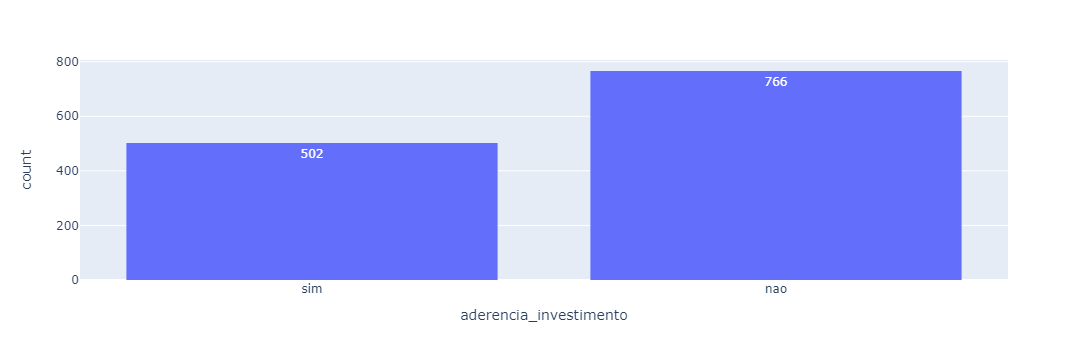

In [143]:
px.histogram(dados,x = "aderencia_investimento",text_auto = True)

In [144]:
#Analisando os dados para ver se existe alguma relação visivel entre o estado civil e a aderencia ao investimento

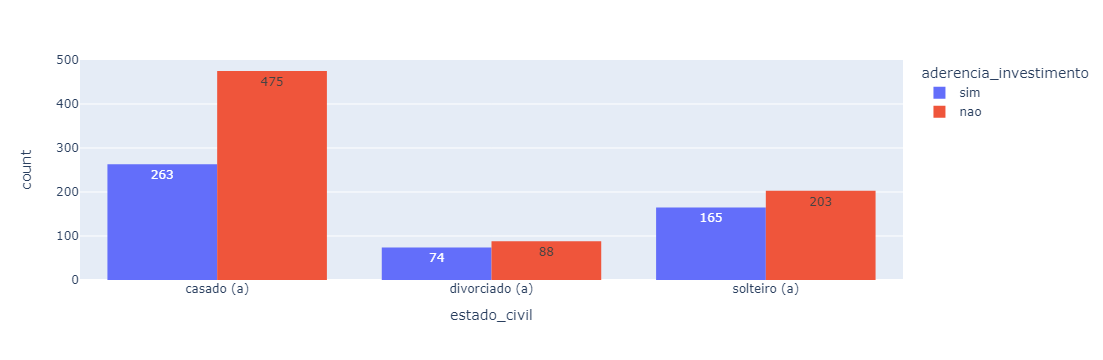

In [145]:
px.histogram(dados,x = "estado_civil",text_auto = True,color = "aderencia_investimento",barmode = "group")

In [146]:
#Fazendo a mesma coisa, porem com escolariedade 

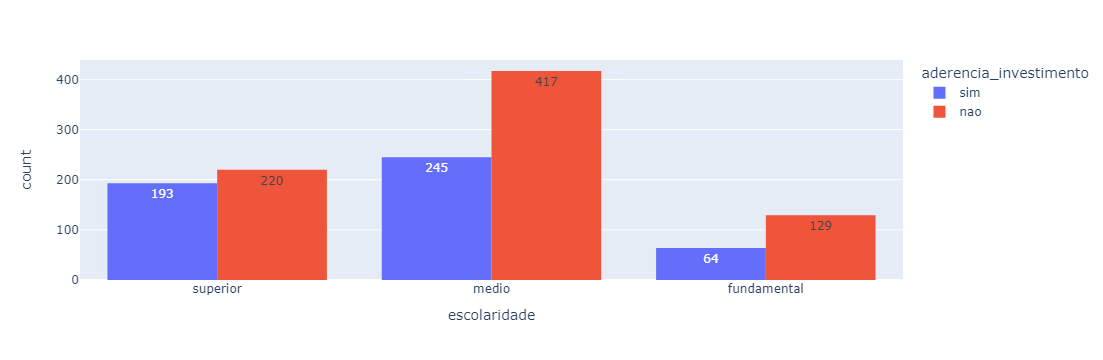

In [147]:
px.histogram(dados,x = "escolaridade",text_auto = True,color = "aderencia_investimento",barmode = "group")

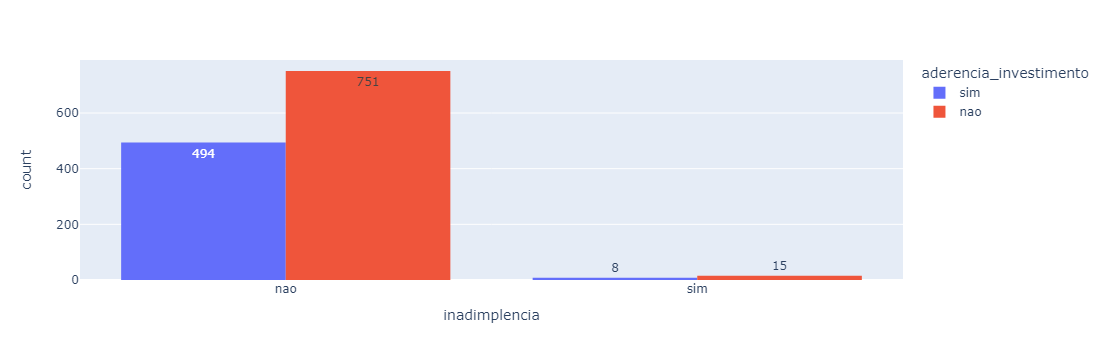

In [229]:
#Fazendo a mesma coisa, porem com inadimplencia 
px.histogram(dados, x = 'inadimplencia', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

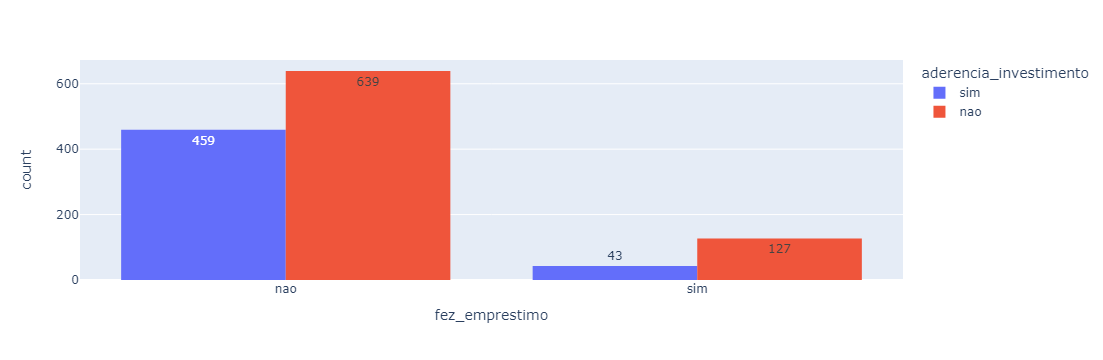

In [230]:
#Fazendo a mesma coisa, porem com "fez_emprestimo" 
px.histogram(dados, x = 'fez_emprestimo', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [148]:
#Realizar boxplot para verficicar possiveis inconsistencias na idade, como uma idade negativa, por exemplo

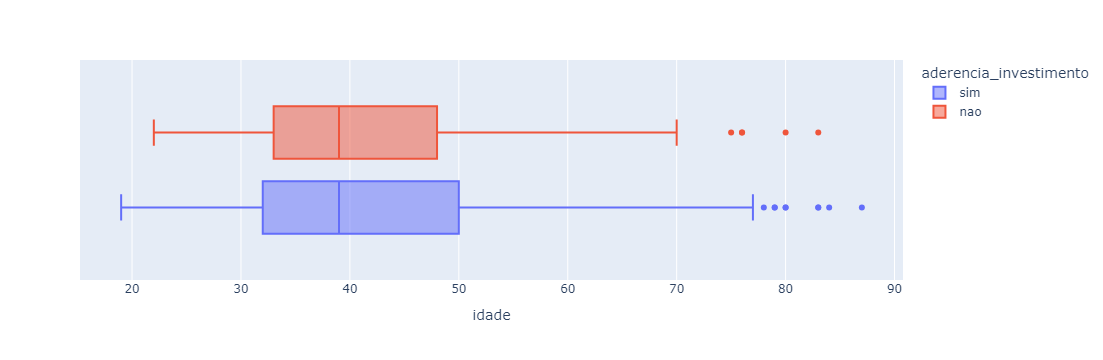

In [149]:
px.box(dados,x="idade",color = "aderencia_investimento")

In [150]:
#Aparentemente os dados são validos, o minimo de idade é 19 e o max 87, condizendo com a realidade.

In [151]:
#Usando boxplot para verificar saldo

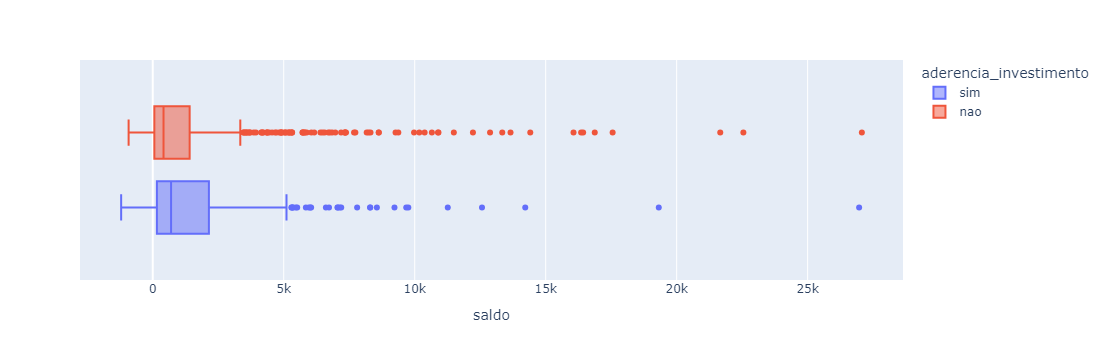

In [152]:
px.box(dados,x="saldo",color = "aderencia_investimento")

In [153]:
#Tudo certo também

In [154]:
#Usando boxplot para verificar tempo_ult_contato  

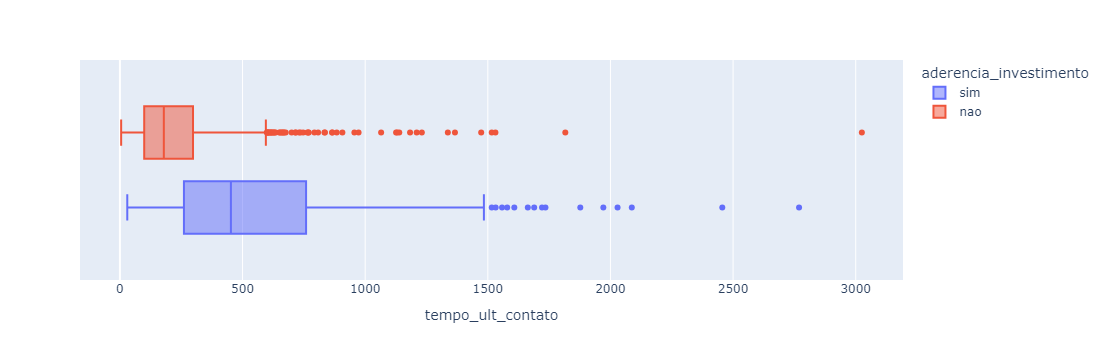

In [155]:
px.box(dados,x="tempo_ult_contato",color = "aderencia_investimento")

In [156]:
#Boxplot demonstrou uma maior discrepancia, porem os dados ainda estáo validos, sem nenhum tempo negativo ou absurdamente alto.

In [157]:
#Usando boxplot para verificar numero de contatos  

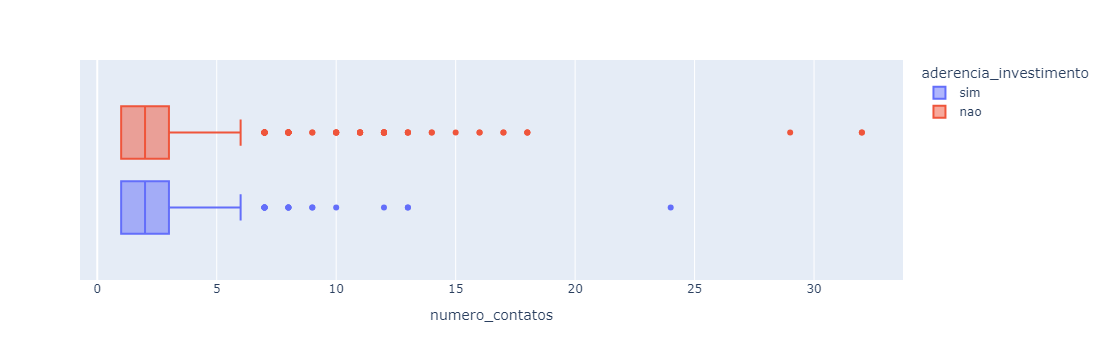

In [158]:
px.box(dados,x="numero_contatos",color = "aderencia_investimento")

In [159]:
#Tudo certo também

In [160]:
#Como nenhum valor se demonstrou inconsistente já é possivel começar a adaptar os dados nao numericos para dados numericos

In [161]:
#Usando o One-Hot Encoding para arrumar as colunas que não são numericas.

In [162]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [163]:
#separando os dados 

In [164]:
x = dados.drop(columns = ["aderencia_investimento"])

In [165]:
y = dados["aderencia_investimento"]

In [166]:
#Coletando as colunas antes do oneHotEncoder

In [167]:
columns = x.columns

In [168]:
#Instanciando o onehotencoder, usando o make_column_transformer para alterar mais de um de uma vez, especificando as colunas e aplicando o if_binary
#Para caso seja binario ele apagar uma das 2 colunas que iam ser geradas.

In [169]:
one_hot_encoder = make_column_transformer((
    OneHotEncoder(drop = "if_binary"),
    ["estado_civil","escolaridade","inadimplencia","fez_emprestimo"]
), 
remainder = "passthrough", sparse_threshold = 0)

In [170]:
x = one_hot_encoder.fit_transform(x)

In [171]:
#Descobrindo o nome das novas colunas 

In [172]:
one_hot_encoder.get_feature_names_out(columns)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [173]:
#Fazendo o x voltar a ser um dataframe

In [174]:
pd.DataFrame(x, columns = one_hot_encoder.get_feature_names_out(columns))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [175]:
#Usando o label encoder para fazer a mesma alteração feita no x, so que para a label(y)

In [176]:
from sklearn.preprocessing import LabelEncoder

In [177]:
label_encoder = LabelEncoder()

In [178]:
y = label_encoder.fit_transform(y)

In [179]:
print(y)

[1 1 0 ... 1 1 1]


In [180]:
from sklearn.model_selection import train_test_split

In [181]:
#Usando o train test split para dividir os valores de treino e teste, e aplicando o stratify para que a proporção seja mantida

In [182]:
x_train,x_test,y_train,y_test = train_test_split(x,y, stratify = y,random_state = 332)

In [183]:
#Importando o dummy_classifier para ter uma metrica base de acerto

In [184]:
from sklearn.dummy import DummyClassifier

In [185]:
dummy = DummyClassifier()
dummy.fit(x_train,y_train)
dummy.score(x_test,y_test)

0.6025236593059937

In [186]:
from sklearn.tree import DecisionTreeClassifier

In [187]:
tree = DecisionTreeClassifier(random_state = 332)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=332)

In [188]:
tree.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [189]:
tree.score(x_test,y_test)

0.6529968454258676

In [190]:
#Temos que descobrir porque o valor está tão proximo da base (60%)

In [191]:
#Vou plotar a tree para ver qual o motivo.

In [192]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [193]:
columns_names = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']


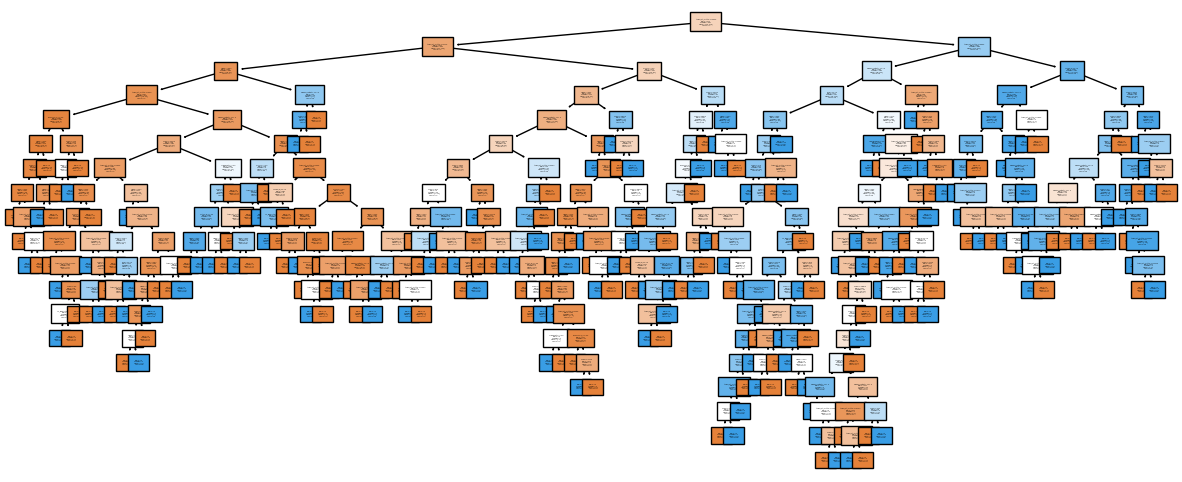

In [194]:
plt.figure(figsize = (15,6))
plot_tree(tree,filled = True,class_names = ["nao","sim"],fontsize = 1, feature_names = columns_names)
plt.show()

In [195]:
#Ao plotar a decision tree o motivo do porque a porcentagem de acerto foi baixa fica clara, o modelo está sofrendo OverFitting,
#Ou seja, ele está sendo tão "especifico" em suas decisoes que acaba errando bastante quando os dados não vem exatamente como aqueles de treino.

In [196]:
#Vou diminuir o max_depth para 3 

In [197]:
tree = DecisionTreeClassifier(random_state = 332,max_depth = 3)
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.7287066246056783

In [198]:
#O valor aumentou bastante, apenas diminuindo a profundidade maxima da arvore, vou plota-la para ver como está agora

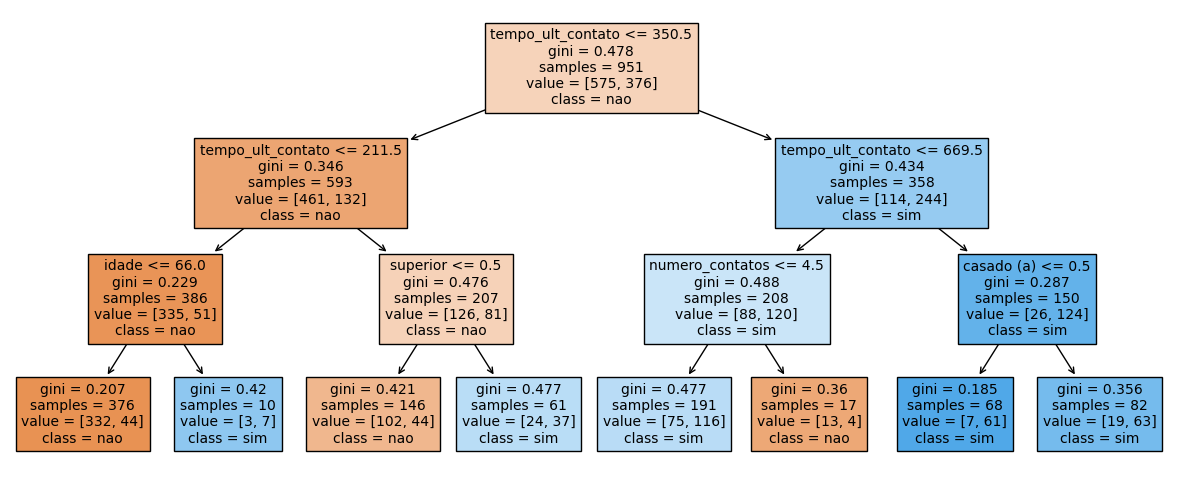

In [199]:
plt.figure(figsize = (15,6))
plot_tree(tree,filled = True,class_names = ["nao","sim"],fontsize = 10, feature_names = columns_names)
plt.show()

In [200]:
#Podemos reparar que o tempo de contrato é a coisa mais relevante ao determinar a aderencia_investimento

In [201]:
#Certo, agora que ja chegamos em uma porcentagem de acerto decente podemos aplicar outro modelo para ver se melhora
# essa porcentagem de acerto.
#Vou usar agora o KNN, mas para isso, vou normalizar os dados antes.

In [202]:
from sklearn.preprocessing import MinMaxScaler 

In [203]:
normalization = MinMaxScaler()
x_normalized_train = normalization.fit_transform(x_train)

In [204]:
pd.DataFrame(x_normalized_train, columns =columns_names )


,casado (a),divorciado (a),solteiro (a),fundamental,medio,superior,inadimplencia,fez_emprestimo,idade,saldo,tempo_ult_contato,numero_contatos
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.323529,0.045376,0.018452,0.000000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.045305,0.071997,0.096774
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.220588,0.042653,0.057164,0.032258
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.338235,0.028117,0.026411,0.129032
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.147059,0.043148,0.029667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
946,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.294118,0.023554,0.008683,0.000000
947,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.102941,0.015809,0.067294,0.000000
948,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.094465,0.033647,0.096774
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.397059,0.044668,0.286179,0.000000


In [205]:
#Importando o KNN 

In [206]:
from sklearn.neighbors import KNeighborsClassifier

In [207]:
#Por padrao K é 5 
knn = KNeighborsClassifier(n_neighbors=3)

In [208]:
knn.fit(x_normalized_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [209]:
x_normalized_test = normalization.fit_transform(x_test)

In [210]:
knn.score(x_normalized_test,y_test)

0.7034700315457413

In [211]:
#Como testamos o KNN e o DecisionTree e notamos que a DecisionTree teve uma porcentagem melhor de acerto(com esses dados)
#Vamos exportar esse modelo ja treinado

In [212]:
import pickle

In [213]:
with open('model_onehotencoder.pkl', "wb") as file:
    pickle.dump(one_hot_encoder, file)

In [214]:
with open('tree_model.pkl', "wb") as file:
    pickle.dump(tree, file)

In [215]:
#Agora temos o modelo da arvore e o onehotencoder, agora vamos simular a entrada de um novo dado

In [216]:
new_data = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}
new_data = pd.DataFrame(new_data)

In [217]:
#Simulando o uso do modelo em um outro ambiente, lendo o .pkl pelo pandas

In [218]:
onehot_model = pd.read_pickle("C:Caminho_ate_seu_hot_encoder/model_onehotencoder.pkl")
tree_model = pd.read_pickle("C:Caminho_ate_seu_tree_model/tree_model.pkl")

In [219]:
#Transformando o dado e depois aplicando o modelo de arvore de decisao.

In [220]:
new_data = onehot_model.transform(new_data)

In [221]:
tree_model.predict(new_data)

array([1])

In [222]:
#Como podemos ver, agora é só usar o modelo ja treinado para obter novas prediçoes, no caso do dado novo demonstrado a seguir, o cliente iria aderir
# ao investimento.

In [223]:
#Uma possivel melhoria ao codigo é a possibilidade de avisar caso a incerteza esteja grande, e deixar para que um humano decida.

In [224]:
#Deixando o limiar de incerteza como 0,65 é possivel ver todas as vezes que a incerteza é maior de 35%, e caso seja a predição saira como Uncertain
threshold = 0.65
y_proba = tree_model.predict_proba(x_test)
y_pred = tree_model.predict(x_test)

In [225]:
final_predictions = []

for proba, pred in zip(y_proba, y_pred):
    if max(proba) >= threshold:
        final_predictions.append(pred)
    else:
        final_predictions.append("Uncertain")
for pred in final_predictions:
    print(pred)

0
Uncertain
0
1
0
Uncertain
Uncertain
1
0
Uncertain
Uncertain
0
Uncertain
0
0
Uncertain
Uncertain
Uncertain
1
Uncertain
Uncertain
1
1
Uncertain
0
0
0
0
1
0
0
0
0
0
0
1
Uncertain
Uncertain
0
0
0
Uncertain
Uncertain
0
0
0
0
0
Uncertain
0
0
0
0
1
Uncertain
Uncertain
0
0
0
0
Uncertain
0
1
Uncertain
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
Uncertain
0
Uncertain
0
0
Uncertain
0
0
0
0
0
Uncertain
0
Uncertain
Uncertain
Uncertain
0
0
0
Uncertain
0
0
0
0
0
1
0
1
Uncertain
Uncertain
Uncertain
0
1
0
0
1
0
0
0
0
0
Uncertain
0
0
0
0
0
0
0
0
Uncertain
0
1
0
1
Uncertain
Uncertain
0
0
0
Uncertain
0
0
1
0
Uncertain
0
0
0
0
0
0
0
1
1
Uncertain
Uncertain
0
0
0
1
1
1
0
0
0
0
0
0
1
0
Uncertain
0
0
0
Uncertain
Uncertain
0
Uncertain
0
Uncertain
0
Uncertain
0
Uncertain
Uncertain
0
1
0
Uncertain
0
0
0
Uncertain
1
0
0
Uncertain
0
0
Uncertain
0
0
0
Uncertain
Uncertain
0
Uncertain
1
0
Uncertain
0
1
0
0
Uncertain
1
0
0
0
Uncertain
Uncertain
0
0
0
0
0
0
0
0
0
0
0
1
Uncertain
1
0
1
0
0
0
Uncertain
0
Uncertain
1
0
Uncertain
0


In [227]:
#Exemplo de um dado apenas chegando e sendo classificado

In [228]:
probabilities = tree_model.predict_proba(new_data)
bigger_probability = max(probabilities[0])
if bigger_probability <= 0.65:
    result = "uncertain"
else:
    result = tree.predict(new_data)[0]

print(result)

1


In [ ]:
#Com esse retorno de incerteza é possivel fazer uma serie de integrações para já acionar o humano que revisaria esse caso de incerteza
#Projeto Concluido